In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
#display(HTML("<style>.container { font-weight: bold !important;}</style>"))
#display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# 분류(Classification) 성능 평가 지표 

###  정확도(Accuracy)

- 예측결과가동일한 데이터건수/전체예측데이터건수 
- 직관적으로 모델 예측 성능을 나타내는 평가지표이다. 

### 오차 행렬(Confusion Matrix)

- 예측 오류가 얼마인지와 더블어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타낸다.
- True Negative: 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0
- False Positive: 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0
- False Negative: 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
- True Positive: 예측값을 Positive 값 1로 예측했고, 실제 값도 Positive 값 1

###  정밀도(Precision)와 재현율(Recall)
- 정밀도 = TP / (FP + TP)
- 재현율 = TP / (FN + TP)


###  F1 Score(F-measure)
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐


###   ROC(Receiver operation characteristric curve) 곡선과 AUC(Area Under Curve)
- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
- AUC(Area Under Curve) 값은 ROC 곡선 밑에 면적을 구한 값 (1이 가까울수록 좋은 값)


In [ ]:
# 회기의 경우에는 실제값과 예측값의 오차 평균값에 따라 평가를 진행한다. 

### 이진분류 - titanic 인 경우 테스트 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv('titanic_book.csv')
print(titanic_df.sample())

print('='*60)
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)


encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
temp = encoder.transform(titanic_df['Sex'])
titanic_df['Sex'] = temp.reshape(-1, 1)

encoder.fit(titanic_df['Embarked'])
temp = encoder.transform(titanic_df['Embarked'])
titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
temp = encoder.transform(titanic_df['Cabin'])
titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

     PassengerId  Survived  Pclass                           Name     Sex  \
140          141         0       3  Boulos, Mrs. Joseph (Sultana)  female   

     Age  SibSp  Parch Ticket     Fare Cabin Embarked  
140  NaN      0      2   2678  15.2458   NaN        C  


In [9]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [6]:
X_titanic_df = titanic_df.loc[:, 'Pclass':]
y_titanic_df = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11)

model_kn = KNeighborsClassifier(n_neighbors=3)
model_kn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

### 정확도 평가지표 테스트  :  titanic

- from sklearn.metrics import accuracy_score
- accuracy_score(y_test, 모델명.predict(X_test))

In [13]:
import sklearn
from sklearn.metrics import accuracy_score

In [14]:
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_los

In [10]:
accuracy_score(y_test, model_kn.predict(X_test))

0.7150837988826816

In [11]:
X_test.sample(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
620,3,1,27.0,1,0,14.4542,7,0
442,3,1,25.0,1,0,7.7750,7,3
641,1,0,24.0,0,0,69.3000,1,0


In [15]:
model_kn.score(X_test, y_test)

0.7150837988826816

## 오차행렬(Confusion Matrix)

- 오차행렬은 이진 분류의 예측 오류가 얼마인지와 더블어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타낸다.
- 사이킷런의 confusion_matrix 모듈 이용 

```
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model_kn.predict(X_test))


TN (True Negative) : 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0
FP (False Positive) : 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0
FN (False Negative) : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
TP (True Positive): 예측값을 Positive 값 1로 예측했고, 실제 값도 Positive 값 1
```
- 정밀도와 재현율에 사용

<br>
<img src='https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg' width='60%'>

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

#오차행렬
confusion_matrix(y_test, model_kn.predict(X_test))

array([[99, 19],
       [32, 29]], dtype=int64)

In [17]:
# accuracy_score 정확도 = (TN + TP) / (TN + FP + FN + TP)
confmat = confusion_matrix(y_test, model_kn.predict(X_test))
print(accuracy_score(y_test, model_kn.predict(X_test)))
(confmat[0,0] + confmat[1,1]) / (confmat[0,0] + confmat[0,1] + confmat[1,0] + confmat[1,1])

0.7150837988826816


0.7150837988826816

In [18]:
# mean_squared error 오류율 = (FN + FP) / (TN + FP + FN + TP)
print(mean_squared_error(y_test, model_kn.predict(X_test)))
(confmat[0,1] + confmat[1,0]) / (confmat[0,0] + confmat[0,1] + confmat[1,0] + confmat[1,1])

0.2849162011173184


0.2849162011173184

Text(40.0, 0.5, 'Actual')

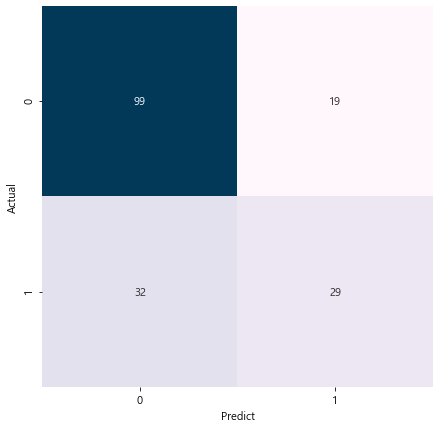

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, model_kn.predict(X_test)), \
            annot=True, cmap='PuBu', cbar=False);
plt.xlabel('Predict')
plt.ylabel('Actual')

## 정밀도(Precision) 과 재현율(Recall)

- 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율이다. 
- 재현율은 실제값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율이다. 

```
from sklearn.metrics import accuracy_score, precision_score , recall_score

precision_score(y_test, 모델명.predict(X_test))
recall_score(y_test, 모델명.predict(X_test)))


confusion_matrix(y_test, 모델명.predict(X_test)) 기준

정밀도 = TP / (FP + TP)
재현율 = TP / (FN + TP)

```

##  정밀도/재현율 트레이드오프 (Precision/Recall Trade-off)

- 정밀도와 재현율은 상호보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기쉽다. 
<br> 이를 정밀도/재현율의 트레이드(Trade Off) 라고 한다. 

##### titanic 에 적용

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

print("정밀도:", precision_score(y_test, model_kn.predict(X_test)))
print("재현율:", recall_score(y_test, model_kn.predict(X_test)))

# Confusion Matrix에 적용 : TP / (FP + TP)
print("\n\n정밀도:", (confmat[1,1] / (confmat[0,1] + confmat[1,1])))

# Confusion Matrix에 적용 : FN / (FP + TP)
print("재현율:", (confmat[1,1] / (confmat[1,0] + confmat[1,1])))

정밀도: 0.6041666666666666
재현율: 0.47540983606557374


정밀도: 0.6041666666666666
재현율: 0.47540983606557374


# F1 Score

- 정밀도와 재현율을 결합한 지표 
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐

\begin{equation}
F1 = 2 \times \frac{precision \times recall}{precision + recall}
\end{equation}

```
from sklearn.metrics import f1_score 

f1_score(y_test , 모델명.predict(X_test))

```

In [22]:
from sklearn.metrics import f1_score 

f1 = f1_score(y_test , model_kn.predict(X_test))
print(f'F1 스코어: {f1:.4f}')


F1 스코어: 0.5321


# classification_report()

- accuracy, precision , recall , f1-score 함께 표시 


```
from sklearn.metrics import classification_report

classification_report(y_test , 모델명.predict(X_test))
```

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_kn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.60      0.48      0.53        61

    accuracy                           0.72       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.70      0.72      0.71       179



# ROC Curve와 AUC

In [24]:
print(X_test.iloc[0])
print(y_test.iloc[0])
#x
print(model_kn.predict([X_test.iloc[0]]))
print(model_kn.predict_proba([X_test.iloc[0]]))

Pclass       3.000000
Sex          0.000000
Age         29.699118
SibSp        1.000000
Parch        0.000000
Fare        16.100000
Cabin        7.000000
Embarked     3.000000
Name: 431, dtype: float64
1
[0]
[[0.66666667 0.33333333]]


roc_auc_score 0.7420116699083078


(0.0, 1.0)

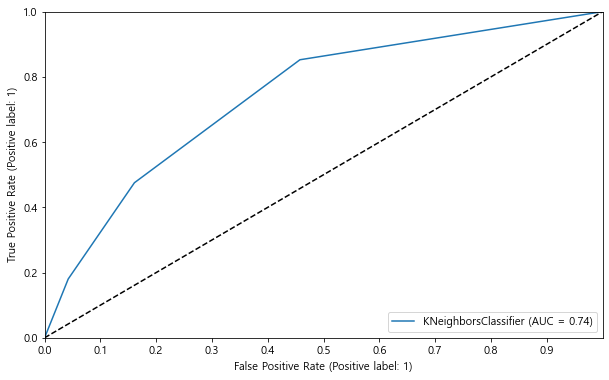

In [26]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

pred_proba_class1 = model_kn.predict_proba(X_test)[:, 1]
print('roc_auc_score', roc_auc_score(y_test, pred_proba_class1))
plot_roc_curve(model_kn, X_test, y_test)
plt.plot([0,1], [0,1], '--k', label='Random')
plt.xticks(np.round(np.arange(0, 1, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

# Quiz

- 타이타닉 데이타셋에 아래의 소스를 참조하여 모델을 다시 생성하고 F1 score, 재현율, 정밀도 등을 출력하여라. 

```
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
```

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv('titanic_book.csv')
print(titanic_df.sample())

print('='*60)
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)


encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
temp = encoder.transform(titanic_df['Sex'])
titanic_df['Sex'] = temp.reshape(-1, 1)

encoder.fit(titanic_df['Embarked'])
temp = encoder.transform(titanic_df['Embarked'])
titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
temp = encoder.transform(titanic_df['Cabin'])
titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)


     PassengerId  Survived  Pclass  \
506          507         1       2   

                                              Name     Sex   Age  SibSp  \
506  Quick, Mrs. Frederick Charles (Jane Richards)  female  33.0      0   

     Parch Ticket  Fare Cabin Embarked  
506      2  26360  26.0   NaN        S  


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
model_rf = RandomForestClassifier(random_state=11)
model_rf.fit(X_train , y_train)

RandomForestClassifier(random_state=11)

In [32]:
from sklearn.metrics import classification_report

# Predict를 수행하고 classification_report() 결과 출력하기
print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



 KNN 적용 결과 
 
 precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.60      0.48      0.53        61

    accuracy                           0.72       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.70      0.72      0.71       179

roc_auc_score 0.8935815504306751


(0.0, 1.0)

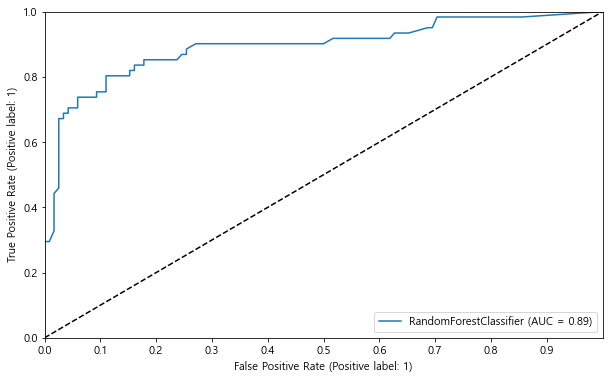

In [33]:
pred_proba_class1 = model_rf.predict_proba(X_test)[:, 1]
print('roc_auc_score', roc_auc_score(y_test, pred_proba_class1))
plot_roc_curve(model_rf, X_test, y_test)

plt.plot([0,1], [0,1], '--k', label='Random')

plt.xticks(np.round(np.arange(0, 1, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

roc_auc_score 0.7420116699083078


(0.0, 1.0)

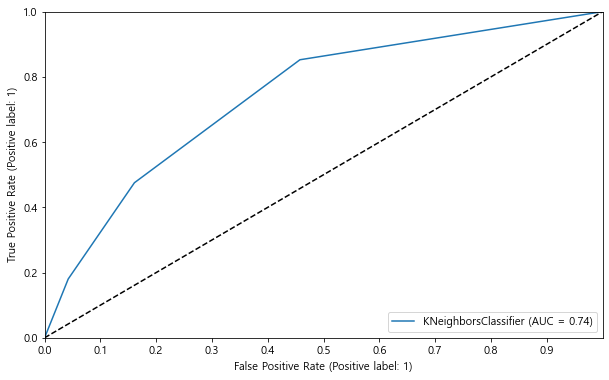

In [34]:
# KNN인 경우 
pred_proba_class1 = model_kn.predict_proba(X_test)[:, 1]
print('roc_auc_score', roc_auc_score(y_test, pred_proba_class1))
plot_roc_curve(model_kn, X_test, y_test)
plt.plot([0,1], [0,1], '--k', label='Random')
plt.xticks(np.round(np.arange(0, 1, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)